In [39]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from typing import Sequence, Union

%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

In [2]:
def fmt_name(name: pd.Series) -> pd.Series:
    split = name.str.split('-').str
    return "(X=" + split[1] + ", Y=" + split[1] + ", Z=" + split[3] + ", C=" + split[5] + ", T=" + split[7] + ")"

In [150]:
def load(path: Union[Path, Sequence[Path]]):
    seq = [path] if isinstance(path, Path) else path
    df = pd.concat(map(pd.read_csv, seq))
    df.name = fmt_name(df.name)
    df.type = df.type.map({
        'Zarr': 'Zarr',
        'TIFF': 'OME-TIFF',
        'Indexed-TIFF': 'Indexed OME-TIFF'
    })
    return df

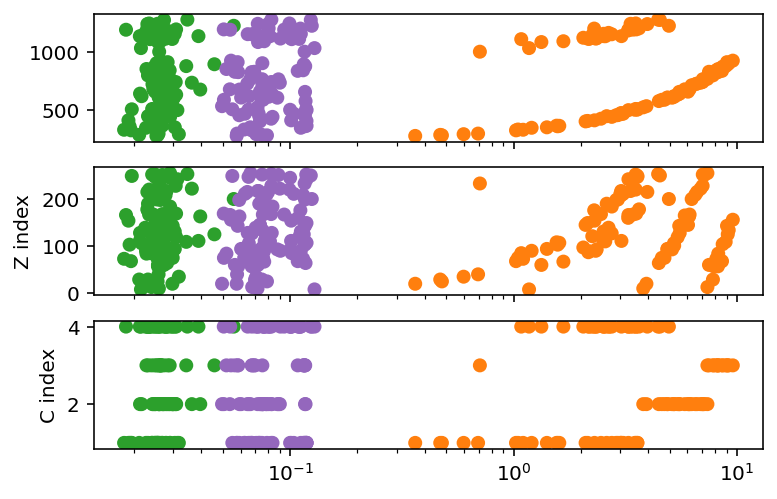

In [152]:
df = load(Path.cwd() / './XY-1920-Z-259-C-4-T-1-XC-256.csv')

colors = {
  'OME-TIFF':'tab:orange', 
  'Zarr':'tab:green', 
  'Indexed OME-TIFF':'tab:purple'
}

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax1.set_xscale('log')
ax1.scatter(
    df.seconds,
    df.c * 256 + df.z,
    c=df.type.map(colors),
)

ax2.set_ylabel('Z index')
ax2.set_xscale('log')
ax2.scatter(
    df.seconds,
    df.z,
    c=df.type.map(colors),
)

ax3.set_ylabel('C index')
ax3.set_xscale('log')
ax3.scatter(
    df.seconds,
    df.c,
    c=df.type.map(colors),
);

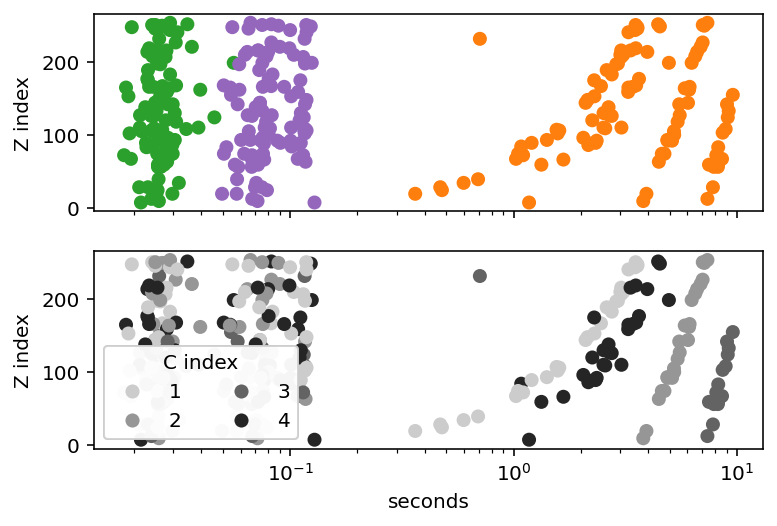

In [153]:
from matplotlib.colors import ListedColormap

fig, (ax2, ax3) = plt.subplots(2, sharex=True)

cmap = {
    1: "#cccccc", 2: "#969696", 3: "#636363", 4: "#252525"
}

ax2.set_ylabel('Z index')
ax2.set_xscale('log')
ax2.scatter(
    df.seconds,
    df.z,
    c=df.type.map(colors),
)

ax3.set_ylabel('Z index')
ax3.set_xlabel('seconds')
ax3.set_xscale('log')
scatter = ax3.scatter(
    df.seconds,
    df.z,
    c=df.c.astype('category'),
    cmap=ListedColormap(["#cccccc", "#969696", "#636363", "#252525"])
)

legend1 = ax3.legend(
    *scatter.legend_elements(),
    loc="lower left",
    title="C index",
    ncol=2
)

ax3.add_artist(legend1)

In [180]:
import ptitprince as pt


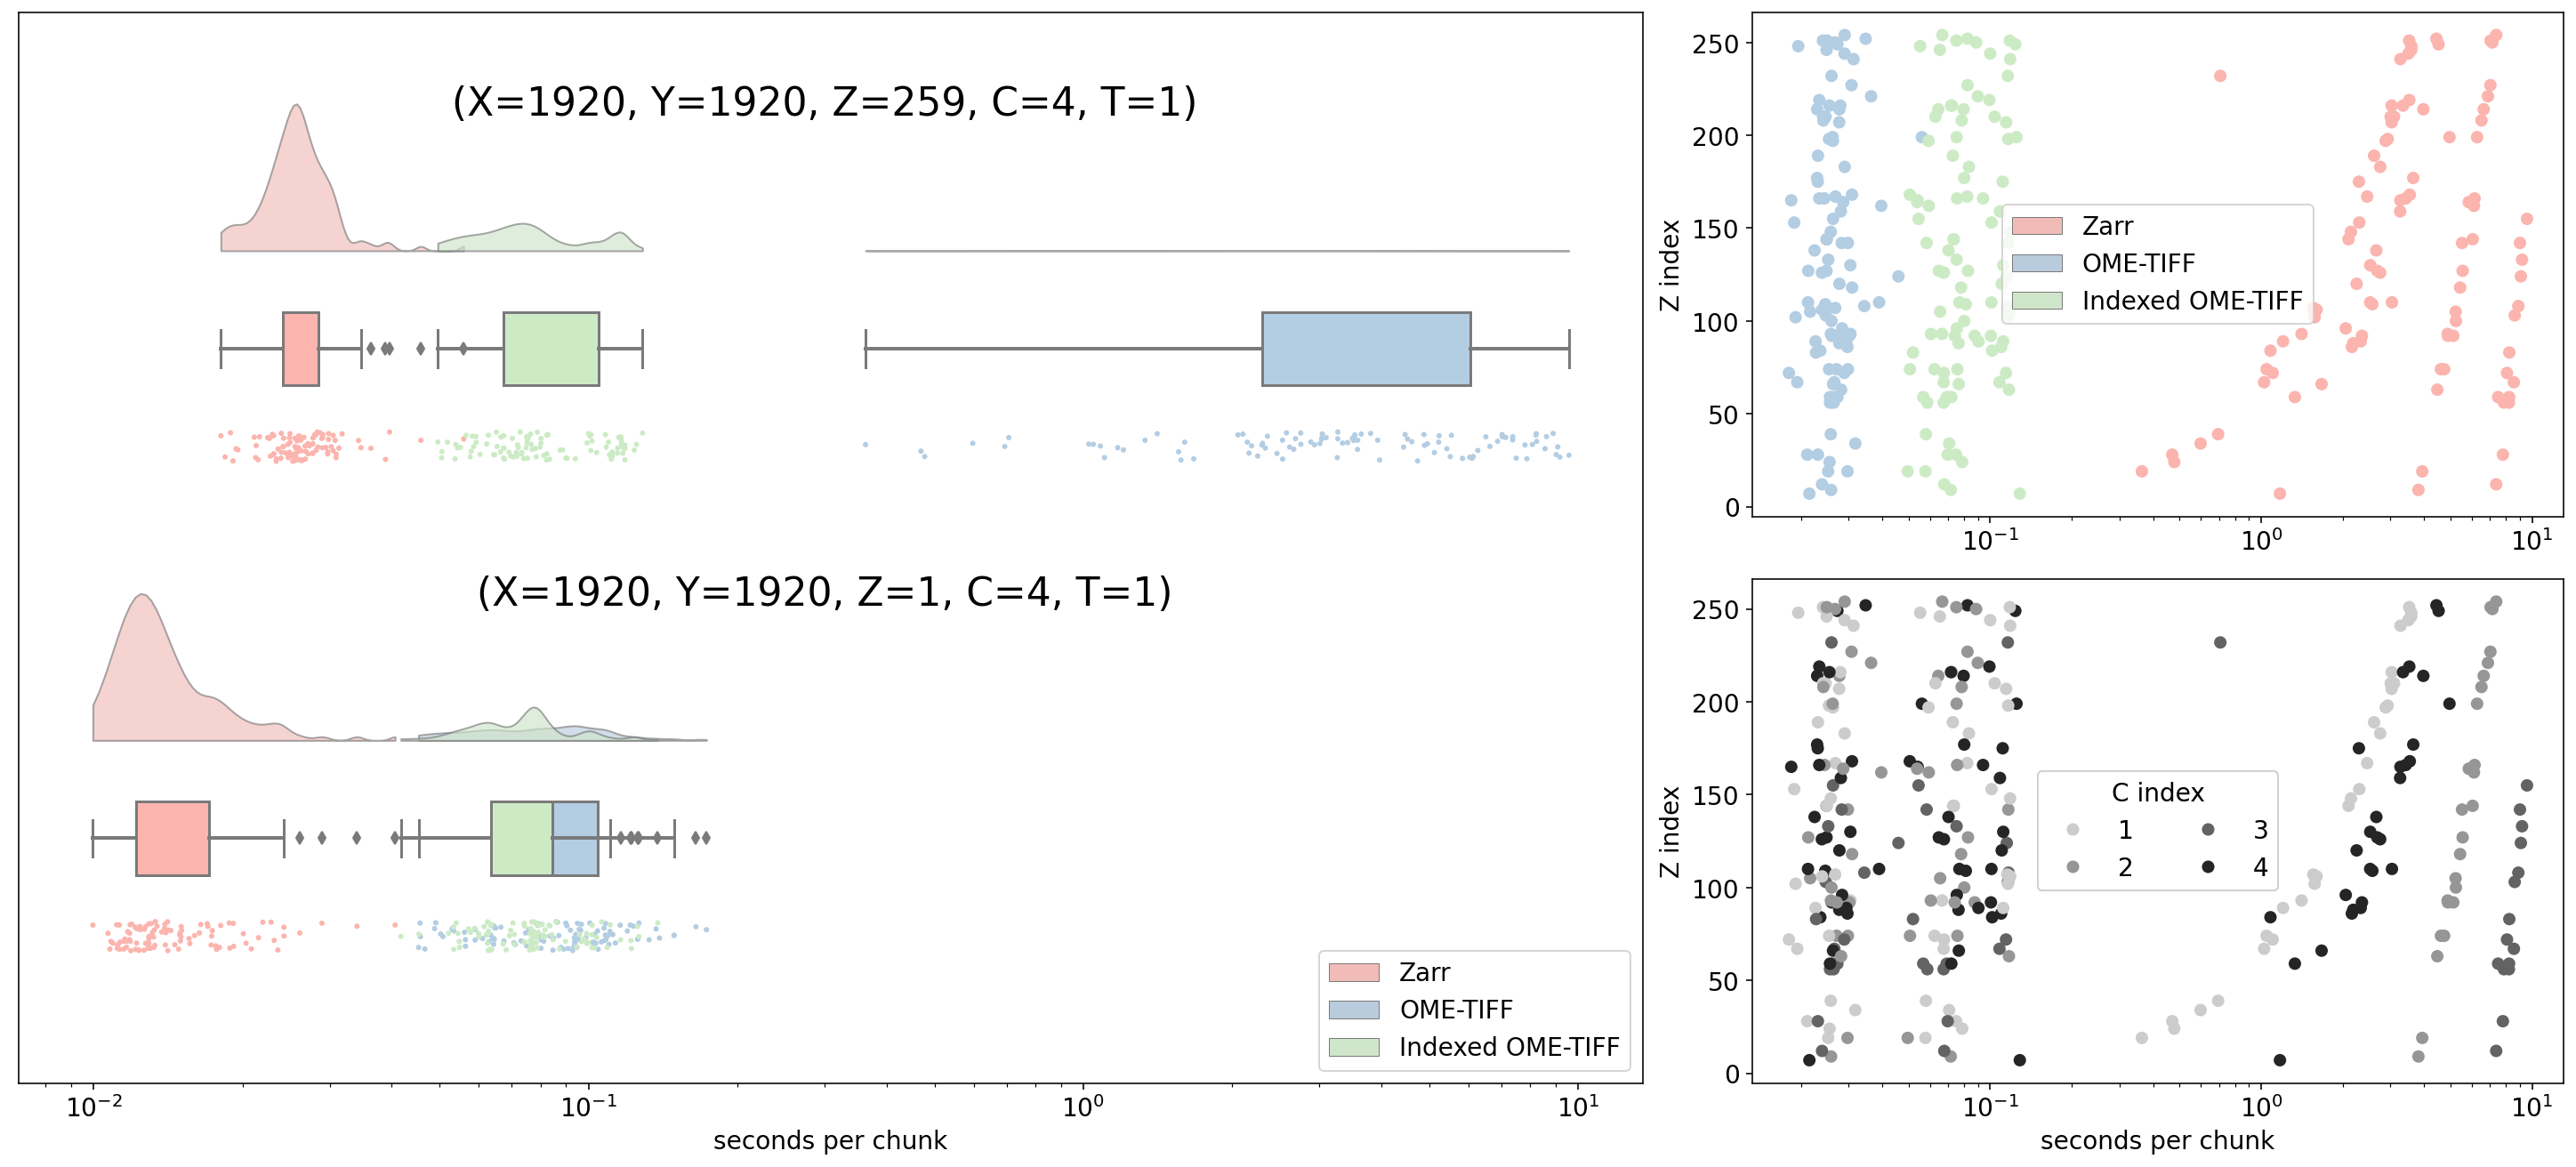

In [230]:
import ptitprince as pt
plt.rcParams.update({'font.size': 14})

f = plt.figure(constrained_layout=True, figsize=(20, 9))
gs = f.add_gridspec(2, 3)

ax = f.add_subplot(gs[:,:2])
ax1 = f.add_subplot(gs[0,2])
ax2 = f.add_subplot(gs[1,2])

cmap = plt.get_cmap('Pastel1')
font = 14

ax = pt.RainCloud(
    x="name",
    y="seconds",
    hue="type",
    data=load(Path.cwd().glob('*.csv')),
    palette=cmap.name,
    width_viol=0.6,
    ax=ax,
    orient="h",
    alpha=0.65,
    jitter=0.03,
    move=0.2,
)

ax.set_xscale("log")
ax.set_xlabel("seconds per chunk")
ax.yaxis.set_visible(False)

ax.text(0.3, -0.5, '(X=1920, Y=1920, Z=259, C=4, T=1)', ha='center', va='center', fontsize=22)
ax.text(0.3, 0.5, '(X=1920, Y=1920, Z=1, C=4, T=1)', ha='center', va='center', fontsize=22)

ax.axes.get_yaxis().get_label().set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:3], labels[0:3], loc="lower right", prop={"size": font})

ax1.set_ylabel('Z index')
ax1.set_xscale('log')
ax1.scatter(
    df.seconds,
    df.z,
    c=df.type.map({ 
      name: cmap.colors[i] 
      for i, name in 
      enumerate(['OME-TIFF', 'Zarr', 'Indexed OME-TIFF'])
    }),
)
ax1.legend(handles[0:3], labels[0:3], prop={"size": font}, loc='center')

ax2.set_ylabel('Z index')
ax2.set_xlabel('seconds per chunk')
ax2.set_xscale('log')
scatter = ax2.scatter(
    df.seconds,
    df.z,
    c=df.c.astype('category'),
    cmap=ListedColormap(["#cccccc", "#969696", "#636363", "#252525"])
)

legend1 = ax2.legend(
    *scatter.legend_elements(),
    title="C index",
    ncol=2,
    loc='center',
    prop={"size": font }
)

ax2.add_artist(legend1);

In [231]:
f.savefig('sfig2.png', dpi=300)